In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [9]:
grades_22_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/2022 grades dataset.csv")
grades_23_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/2023 grades dataset.csv")

mean_grades_nationwide_2022 = 63.135942686136694
mean_grades_nationwide_2023 = 65.47512372896757

# Calculate the variance for each year
variance_2022 = ((grades_22_all['Percentage'] - mean_grades_nationwide_2022) ** 2).mean()
variance_2023 = ((grades_23_all['percentage'] - mean_grades_nationwide_2023) ** 2).mean()

# Calculate the standard deviation for each year
std_2022 = np.sqrt(variance_2022)
std_2023 = np.sqrt(variance_2023)

Read and Merge Datasets

In [10]:
grades_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Copy of Grades_by_Governorate.csv")
gdp_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/GDP_by_Governorate.csv")
health_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Health_by_Governorate.csv")
education_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Education_by_Governorate.csv")
wages_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Wages_by_Governorate.csv")

workforce= pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/TypeAndTotalOfWorkForceByGovernorate.xlsx")
workforce_df = workforce.to_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/TypeAndTotalOfWorkForceByGovernorate.csv")

merged_df = pd.merge(gdp_df, grades_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, health_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, education_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, wages_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, workforce, on='Governorate', how='inner')


In [11]:
print(merged_df.columns)
print(merged_df.shape)

Index(['Governorate', 'Agriculture', 'Crude Petroleum Extraction',
       'Other extractions', 'Petroleum Refinement', 'Manufacturing Industries',
       'Electricity and Gas', 'Water', 'Sewerage', 'Waste Recycling',
       'Construction', 'Whole sale and Retail Trade', 'Communication',
       'Information', 'Transportation and Storage',
       'Accommodation and Food Service Activities', 'Real Estate Ownership',
       'Business Services', 'Education', 'Health', 'Other Services',
       'Non Financial Corporations', 'Financial Corporations',
       'General Government',
       'Non Profit Institutions Serving House hold Sector', 'DomesticWorkers',
       'Total Governorate GDP', 'Literature_2022', 'Math_2022', 'Science_2022',
       'total_mean_2022', 'Literature_2023', 'Math_2023', 'Science_2023',
       'total_mean_2023', 'Population', 'Hospitals_numbers', 'Beds_numbers',
       'Intensive_Care_Beds_numbers', 'Incubators_numbers',
       'Dialysis_Devices_numbers', 'Respirators_numb

## High School Grades Analysis

In [12]:
merged_df['Literature_avg'] = merged_df[['Literature_2022', 'Literature_2023']].mean(axis=1)
merged_df['Math_avg'] = merged_df[['Math_2022', 'Math_2023']].mean(axis=1)
merged_df['Science_avg'] = merged_df[['Science_2022', 'Science_2023']].mean(axis=1)
merged_df['total_mean_avg'] = merged_df[['total_mean_2022', 'total_mean_2023']].mean(axis=1)

Sort Data by 2023 Average *Grades*

In [13]:
merged_df.sort_values(by=['total_mean_2023'],ascending=False, inplace=True)

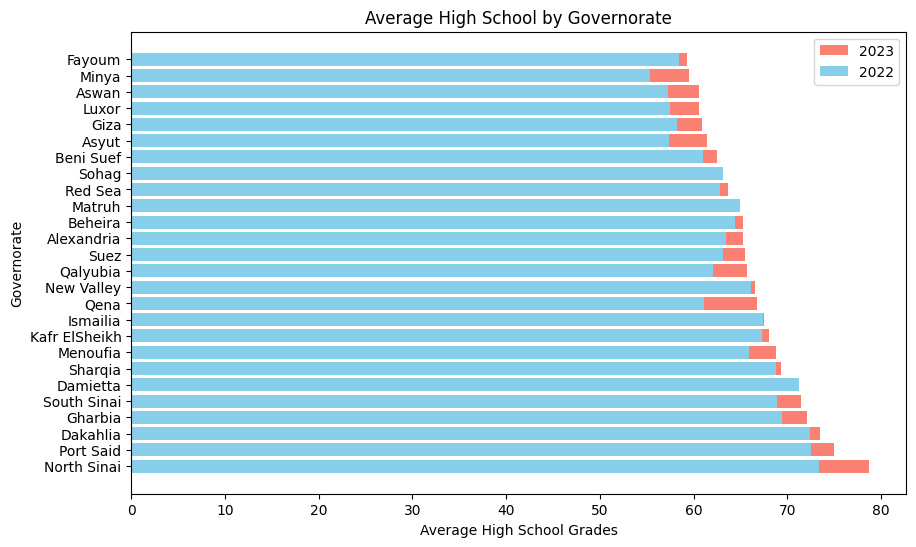

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(merged_df['Governorate'], merged_df['total_mean_2023'], color='salmon', label="2023")
plt.barh(merged_df['Governorate'], merged_df['total_mean_2022'], color='skyblue',label="2022")
plt.xlabel('Average High School Grades')
plt.ylabel('Governorate')
plt.title('Average High School by Governorate')
plt.legend()
plt.show()

### Average Total Grades by Governorate in 2022 and 2023

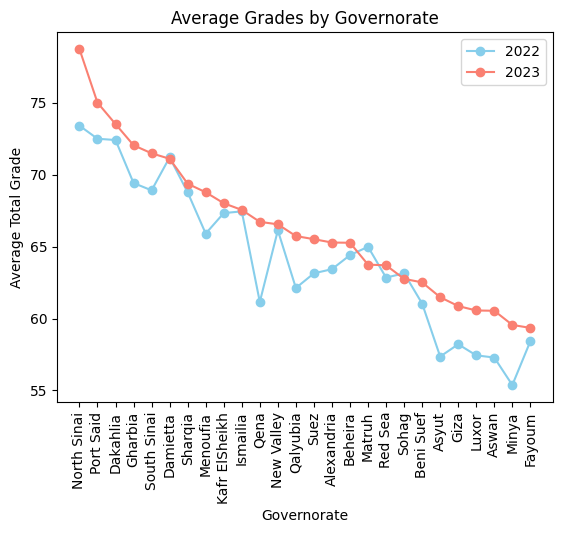

In [15]:
merged_df = merged_df.sort_values(by="total_mean_2023",ascending=False)
plt.plot(merged_df['Governorate'], merged_df['total_mean_2022'], marker='o', linestyle='-', color='skyblue',label="2022")
plt.plot(merged_df['Governorate'], merged_df['total_mean_2023'], marker='o', linestyle='-', color='salmon',label="2023")

plt.title('Average Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Total Grade')
plt.xticks(rotation=90)
plt.legend()
print()

### Average Grades by Section from 2022 to 2023

Math Section

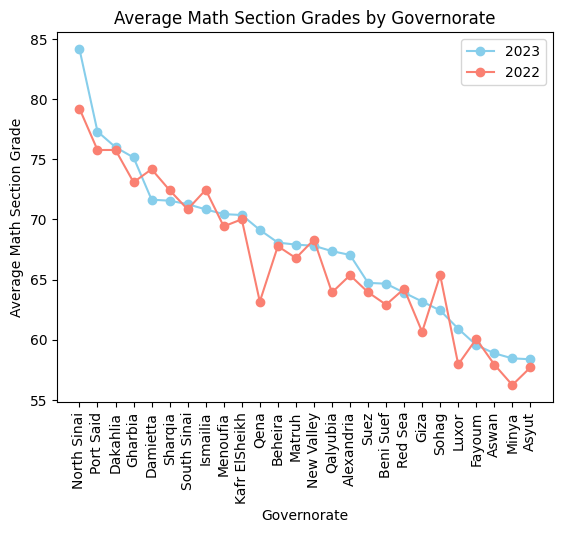

In [16]:
merged_df.sort_values(by="Math_2023",inplace=True,ascending = False)
plt.plot(merged_df['Governorate'], merged_df['Math_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Math_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Math Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Math Section Grade')
plt.xticks(rotation=90)
plt.legend()

print()

Science Section

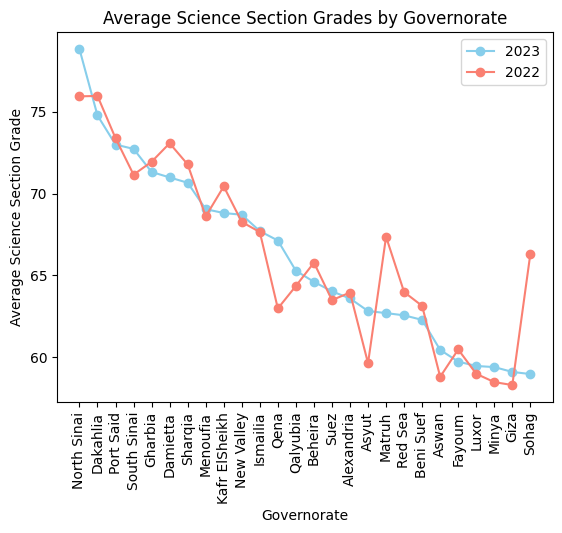

In [17]:
merged_df.sort_values(by="Science_2023",inplace=True,ascending = False)
plt.plot(merged_df['Governorate'], merged_df['Science_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Science_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Science Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Science Section Grade')
plt.xticks(rotation=90)
plt.legend()
print()

Literature Section

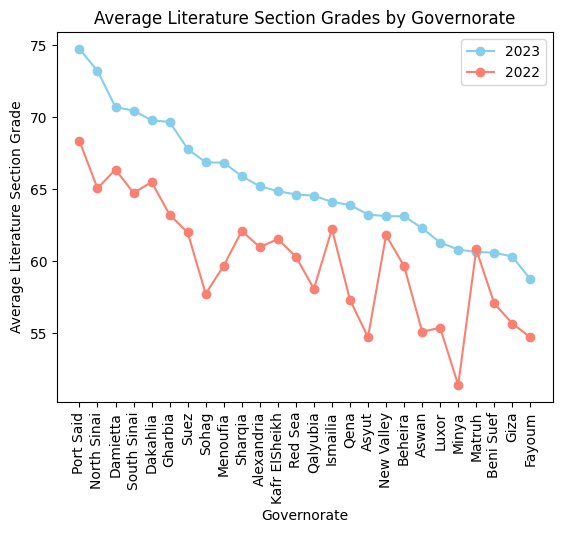

In [18]:
merged_df.sort_values(by="Literature_2023",inplace=True,ascending = False)

plt.plot(merged_df['Governorate'], merged_df['Literature_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Literature_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Literature Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Literature Section Grade')
plt.xticks(rotation=90)

plt.legend()
print()

### Difference From mean grades

In [19]:
# Calculate the Z-scores for 2022 grades
merged_df['zscore_2022'] = (merged_df['total_mean_2022'] - mean_grades_nationwide_2022) / std_2022

# Calculate the Z-scores for 2023
merged_df['zscore_2023'] = (merged_df['total_mean_2023'] - mean_grades_nationwide_2023) / std_2023


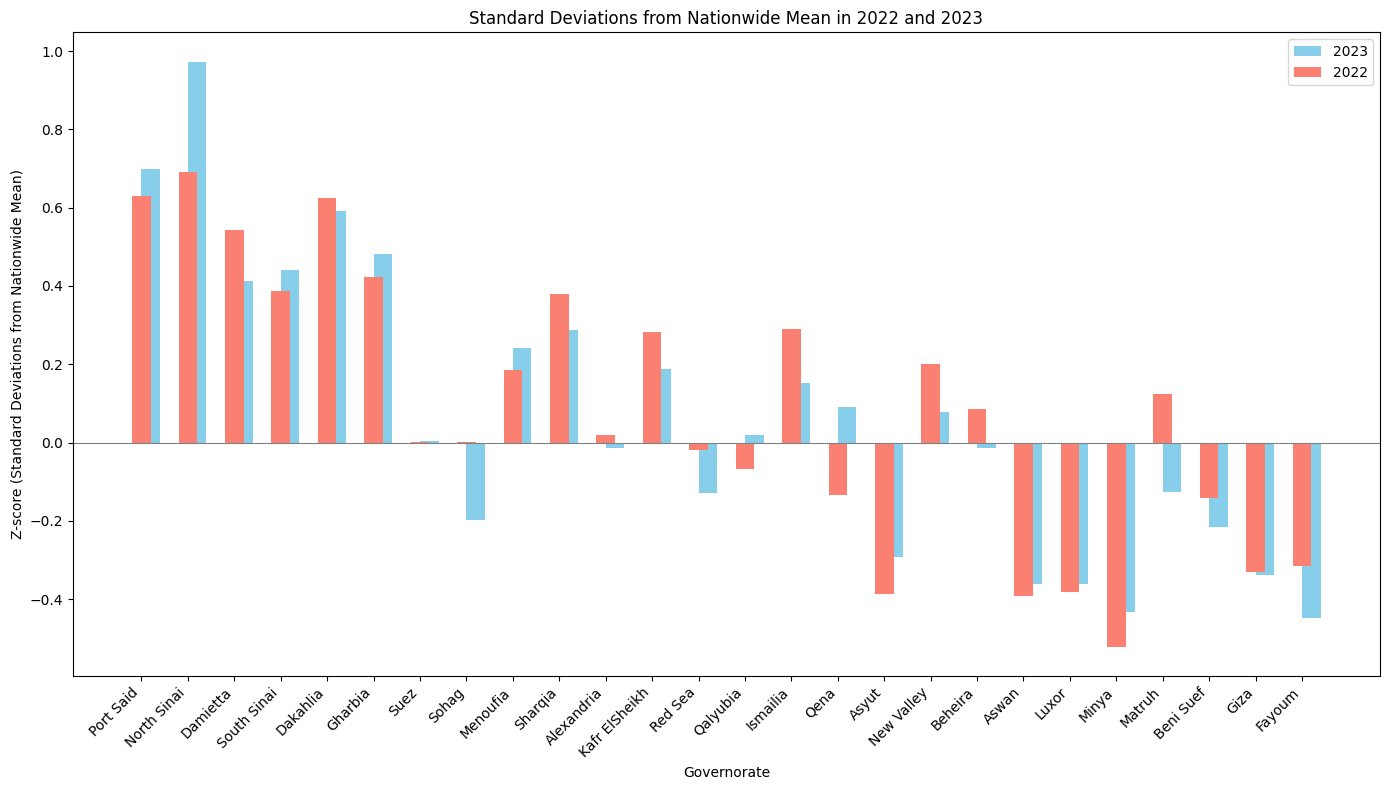

In [20]:

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the Z-scores for 2023 (offset by 0.4 to avoid overlap)
ax.bar(merged_df['Governorate'], merged_df['zscore_2023'],color = "skyblue", width=0.4, label='2023', align='edge')

# Plot the Z-scores for 2022
ax.bar(merged_df['Governorate'], merged_df['zscore_2022'],color = "salmon", width=0.4, label='2022', align='center')


# Add a horizontal line at y=0 to indicate the nationwide mean
ax.axhline(0, color='gray', linewidth=0.8)

# Add labels and title
ax.set_xlabel('Governorate')
ax.set_ylabel('Z-score (Standard Deviations from Nationwide Mean)')
ax.set_title('Standard Deviations from Nationwide Mean in 2022 and 2023')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Distribution

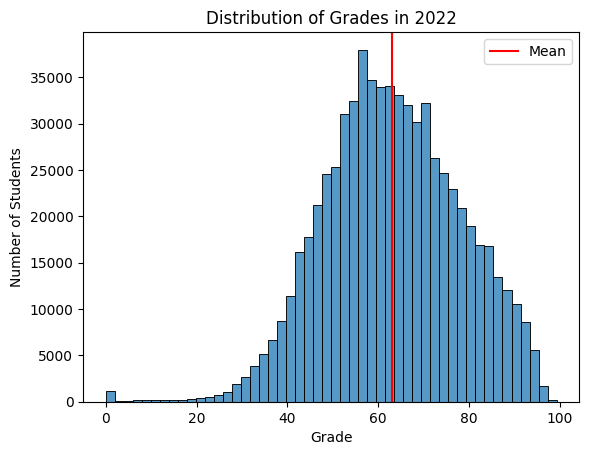

In [21]:
sns.histplot(data=grades_22_all, x="Percentage", bins=50)

# Add labels and title
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.title("Distribution of Grades in 2022")

# Add a vertical line for the mean
mean_grade = mean_grades_nationwide_2022
plt.axvline(mean_grade, color='r', label="Mean")

# Show the plot
plt.legend()
plt.show()

## GDP per Governorate

Merge population with gdp


In [22]:
economic_activities = ['Agriculture', 'Crude Petroleum Extraction', 'Other extractions', 'Petroleum Refinement',
                       'Manufacturing Industries', 'Electricity and Gas', 'Water', 'Sewerage', 'Waste Recycling',
                       'Construction', 'Whole sale and Retail Trade', 'Communication', 'Information', 'Transportation and Storage',
                       'Accommodation and Food Service Activities', 'Real Estate Ownership', 'Business Services', 'Education',
                       'Health', 'Other Services', 'Financial Corporations',
                       'General Government', 'DomesticWorkers','Total Governorate GDP']

for activity in economic_activities:
  merged_df[activity] = merged_df[activity] / merged_df['Population']

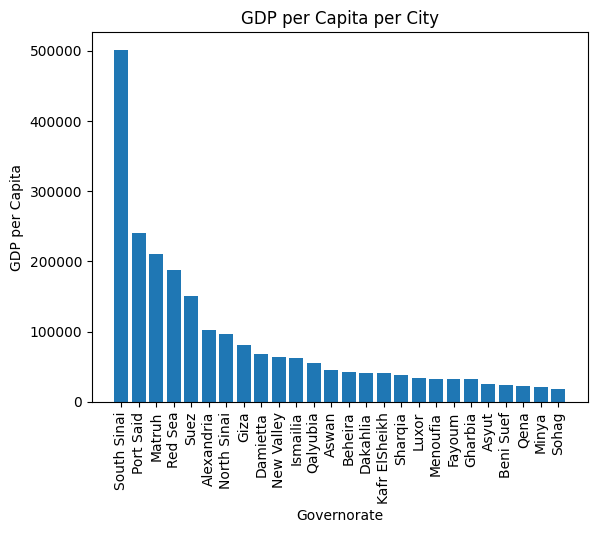

In [23]:
merged_df = merged_df.sort_values(by = "Total Governorate GDP",ascending=False)
plt.bar(merged_df['Governorate'], merged_df['Total Governorate GDP'])

# Add labels and title
plt.xlabel("Governorate")
plt.ylabel("GDP per Capita")
plt.title("GDP per Capita per City")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

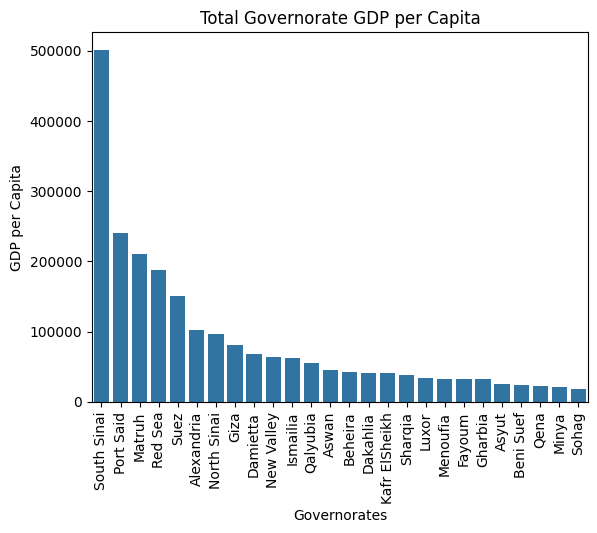

In [24]:
# Create the bar plot
sns.barplot(x=merged_df['Governorate'], y=merged_df['Total Governorate GDP'])

# Add labels and title
plt.xlabel("Governorates")
plt.ylabel("GDP per Capita")
plt.title("Total Governorate GDP per Capita")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Calculate the correlations and select the top N factors:

In [25]:

relevant_columns = [
    'Agriculture','Other extractions',
    'Petroleum Refinement', 'Manufacturing Industries', 'Electricity and Gas',
    'Water', 'Sewerage', 'Waste Recycling', 'Construction',
    'Whole sale and Retail Trade', 'Communication',
    'Transportation and Storage',
    'Real Estate Ownership', 'Business Services', 'Education', 'Health',
    'Other Services', 'Non Financial Corporations', 'Financial Corporations',
    'General Government', 'Non Profit Institutions Serving House hold Sector',
    'DomesticWorkers', 'Total Governorate GDP','zscore_2022','zscore_2023'
]
# Calculate the correlation matrix
corr_matrix = merged_df[relevant_columns].corr()

# Define target columns
target_columns = ['zscore_2022','zscore_2023']

# Define the number of top factors to select
top_n = 3

# Dictionary to store top factors for each target
top_factors = {}
for target in target_columns:
    # Sort correlations with other columns for the target column
    correlations = corr_matrix[target].abs().sort_values(ascending=False)
    # Select top correlated factors excluding target_columns
    top_factors[target] = [factor for factor in correlations.index if factor not in target_columns][:top_n]
unique_top_factors = set(factor for factors in top_factors.values() for factor in factors)
top_factors



{'zscore_2022': ['General Government', 'Agriculture', 'Total Governorate GDP'],
 'zscore_2023': ['General Government',
  'Transportation and Storage',
  'Total Governorate GDP']}

Plot the correlation heatmap for the selected columns




In [26]:
columns_to_include = ['zscore_2022', 'zscore_2023'] + list(unique_top_factors)
data_subset = merged_df[columns_to_include]

# Calculate the correlation matrix for the subset
corr_subset = data_subset.corr()

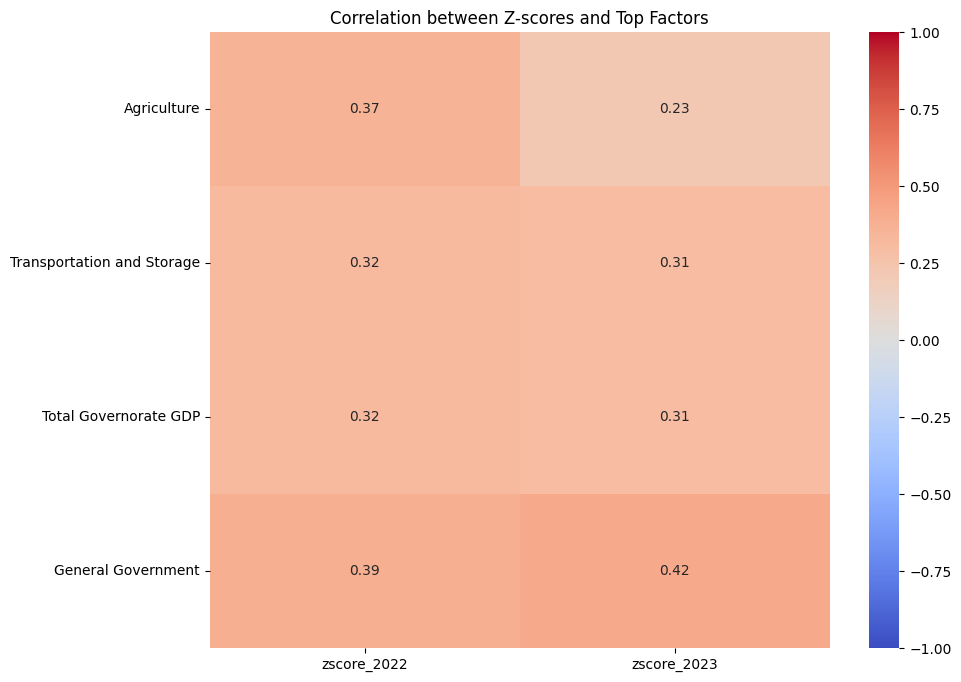

In [27]:
# Select only the correlations with zscore_22 and zscore_23
heatmap_data = corr_subset.loc[list(unique_top_factors), ['zscore_2022', 'zscore_2023']]

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Z-scores and Top Factors')
plt.show()


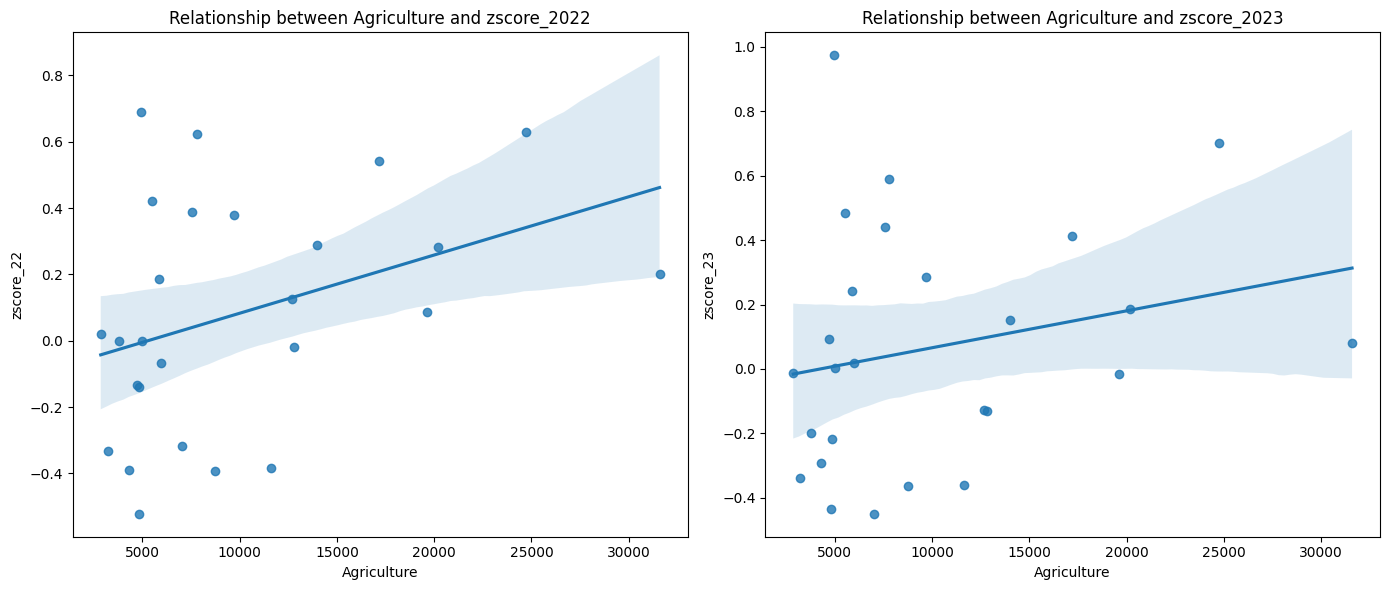

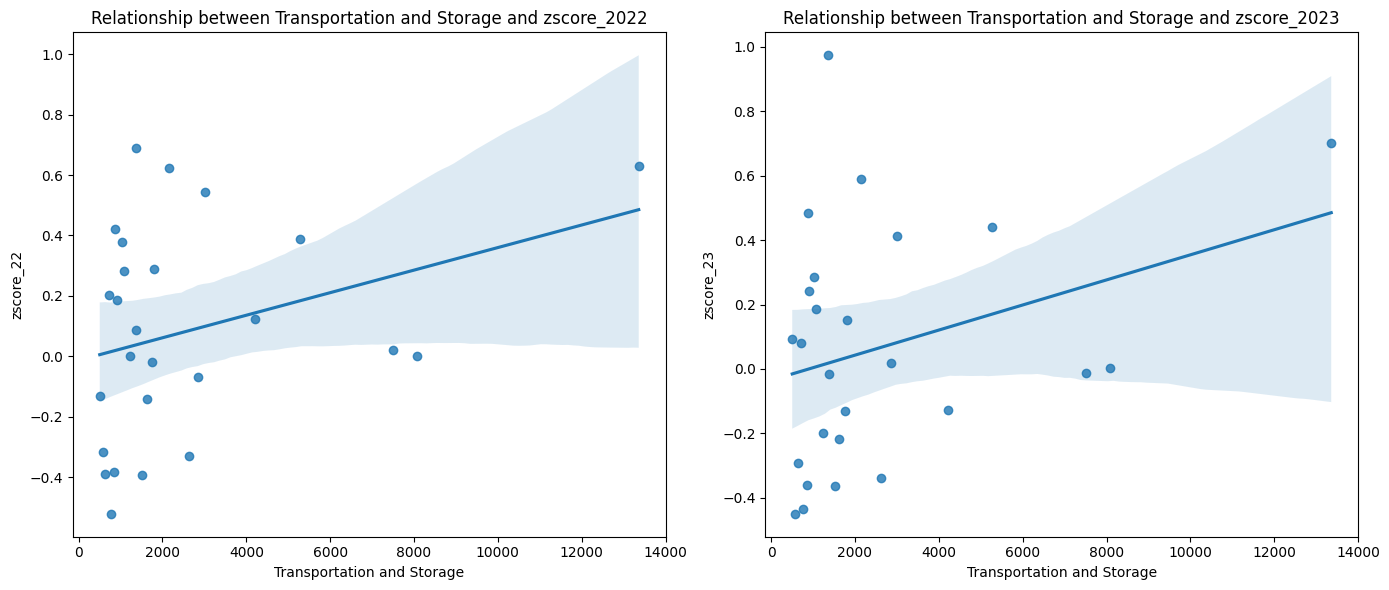

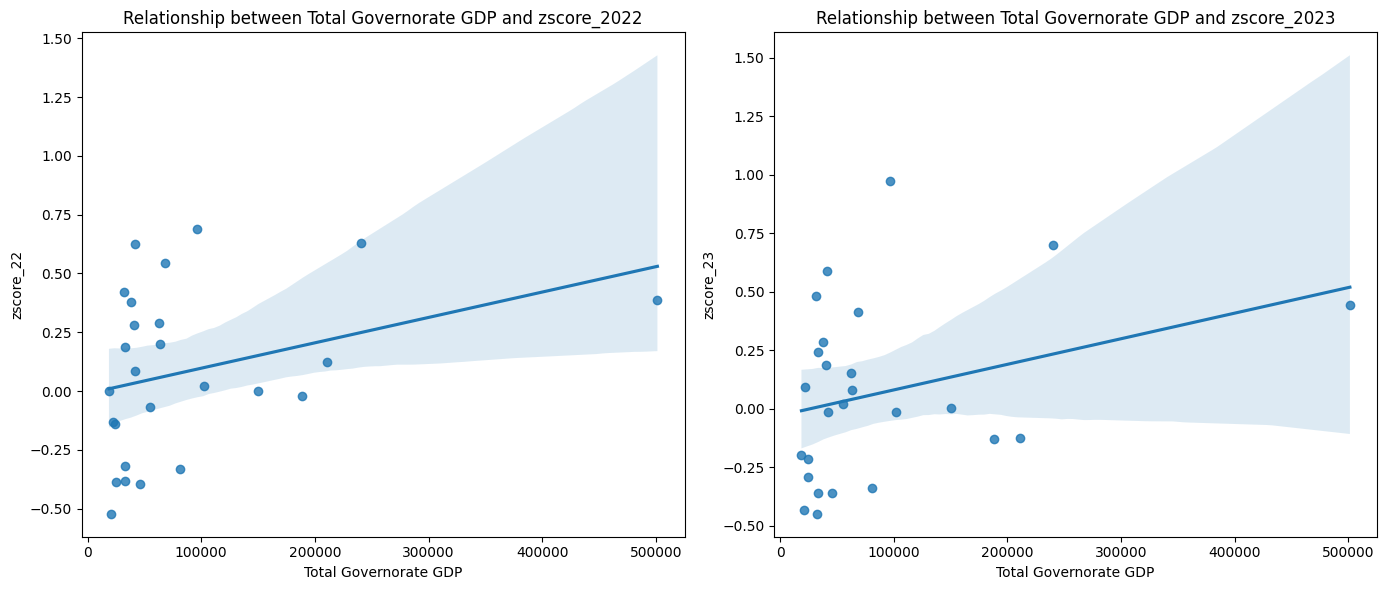

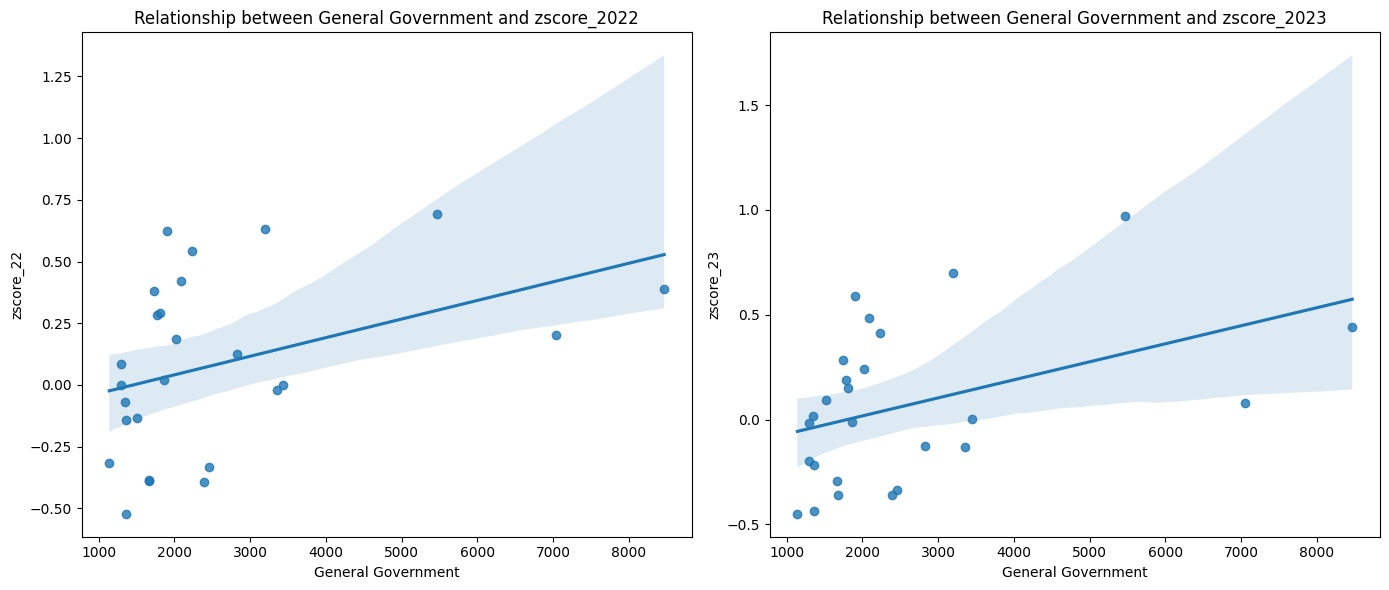

In [28]:
# Plot each correlation
for factor in unique_top_factors:
    plt.figure(figsize=(14, 6))

    # Plot for zscore_22
    plt.subplot(1, 2, 1)
    sns.regplot(x=factor, y='zscore_2022', data=merged_df)
    plt.title(f'Relationship between {factor} and zscore_2022')
    plt.xlabel(factor)
    plt.ylabel('zscore_22')

    # Plot for zscore_23
    plt.subplot(1, 2, 2)
    sns.regplot(x=factor, y='zscore_2023', data=merged_df)
    plt.title(f'Relationship between {factor} and zscore_2023')
    plt.xlabel(factor)
    plt.ylabel('zscore_23')

    plt.tight_layout()
    plt.show()

## Education Data

print(education_df.columns)

In [29]:
merged_df.head()

,Governorate,Agriculture,Crude Petroleum Extraction,Other extractions,Petroleum Refinement,Manufacturing Industries,Electricity and Gas,Water,Sewerage,Waste Recycling,...,Secondary_Education,Below_Secondary_Education,Illiterate,Semiliterate,Literature_avg,Math_avg,Science_avg,total_mean_avg,zscore_2022,zscore_2023
9,South Sinai,7559.437924,202868.966681,3556.984521,0.000000,2724.004327,821.820672,5010.197289,-8.713073,32.991956,...,16,59,51,16,67.607464,71.058850,71.947363,70.204559,0.388481,0.441453
7,Port Said,24735.955802,120697.036207,76.657602,0.000000,20800.080758,2200.833092,548.393961,-1.424770,82.942991,...,28,198,132,155,71.545173,76.541709,73.195826,73.760902,0.629720,0.699912
12,Matruh,12673.404826,133638.676160,18568.312915,0.000000,1500.043491,45.334032,239.228193,43.447477,0.000000,...,19,331,130,300,60.733668,67.351982,65.028647,64.371432,0.124807,-0.126568
20,Red Sea,12794.552902,68966.882655,32.412021,2067.315252,1173.187555,2767.169920,1777.152231,-34.036003,1258.440422,...,21,121,65,102,62.480567,64.080019,63.269224,63.276603,-0.019315,-0.129881
4,Suez,4988.127326,0.000000,291.953553,27241.166146,50226.701184,19148.560219,367.268024,5.482007,85.991198,...,32,302,124,164,64.902834,64.345972,63.755865,64.334890,0.000865,0.003363


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 9 to 18
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Governorate                                        26 non-null     object 
 1   Agriculture                                        26 non-null     float64
 2   Crude Petroleum Extraction                         26 non-null     float64
 3   Other extractions                                  26 non-null     float64
 4   Petroleum Refinement                               26 non-null     float64
 5   Manufacturing Industries                           26 non-null     float64
 6   Electricity and Gas                                26 non-null     float64
 7   Water                                              26 non-null     float64
 8   Sewerage                                           26 non-null     float64
 9   Waste Recycling  

58  Total_Avg_Work_Hours                               26 non-null     int64  
 59  Total_Avg_Salary                                   26 non-null     int64  
 60  Total_Count                                        26 non-null     int64  
 61  Female_Avg_Work_Hours                              26 non-null     int64  
 62  Female_Avg_Salary                                  26 non-null     int64  
 63  Female_Count                                       26 non-null     int64  
 64  Male_Avg_Work_Hours                                26 non-null     int64  
 65  Male_Avg_Salary                                    26 non-null     int64  
 66  Male_Count

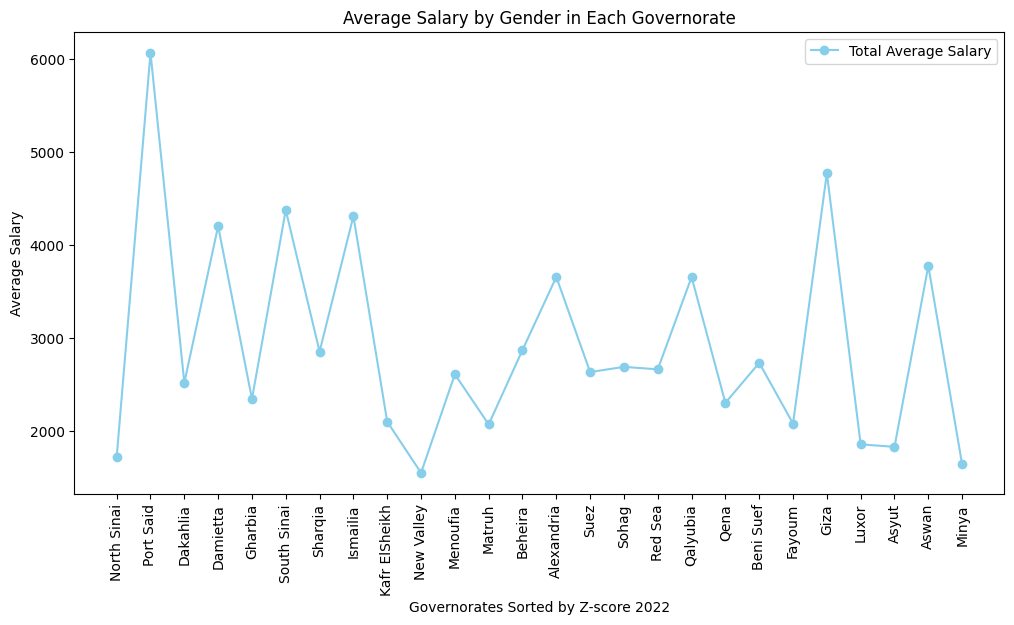

In [31]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Total_Avg_Salary'], marker='o', color='skyblue', label='Total Average Salary')


plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender in Each Governorate')
plt.legend()


plt.show()

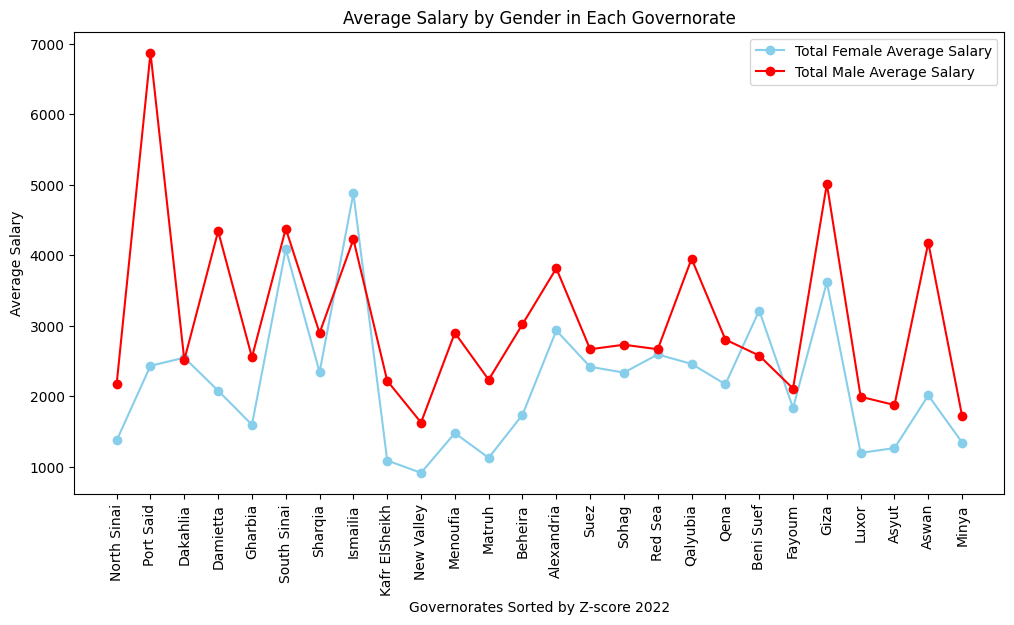

In [32]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Female_Avg_Salary'], marker='o', color='skyblue', label='Total Female Average Salary')

plt.plot(merged_df['Governorate'], merged_df['Male_Avg_Salary'], marker='o', color='red', label='Total Male Average Salary')

plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender in Each Governorate')
plt.legend()


plt.show()

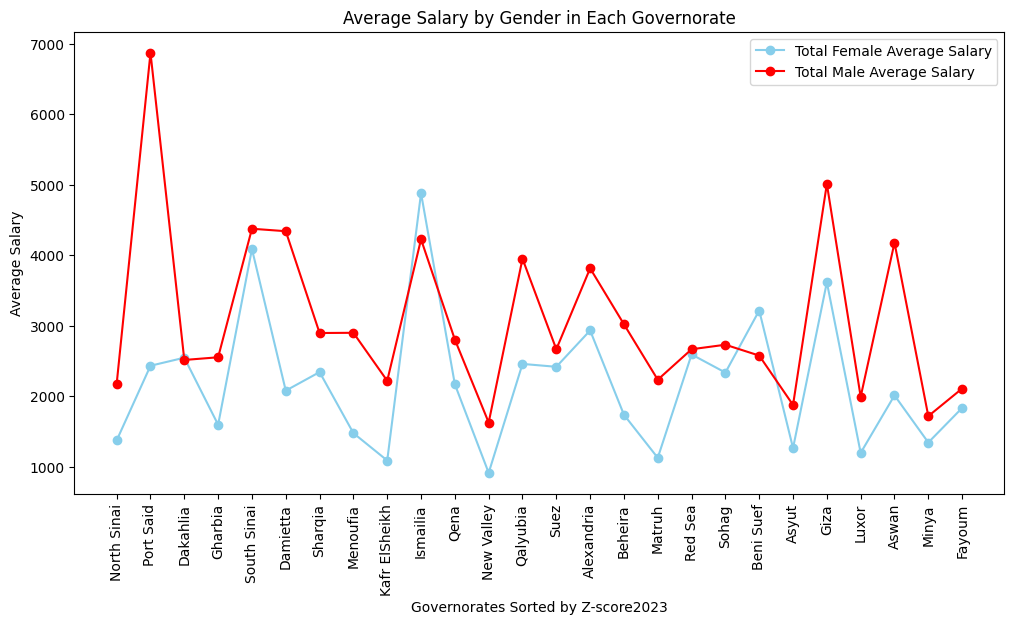

In [33]:
merged_df = merged_df.sort_values(by="zscore_2023",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Female_Avg_Salary'], marker='o', color='skyblue', label='Total Female Average Salary')

plt.plot(merged_df['Governorate'], merged_df['Male_Avg_Salary'], marker='o', color='red', label='Total Male Average Salary')

plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score2023')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender in Each Governorate')
plt.legend()


plt.show()

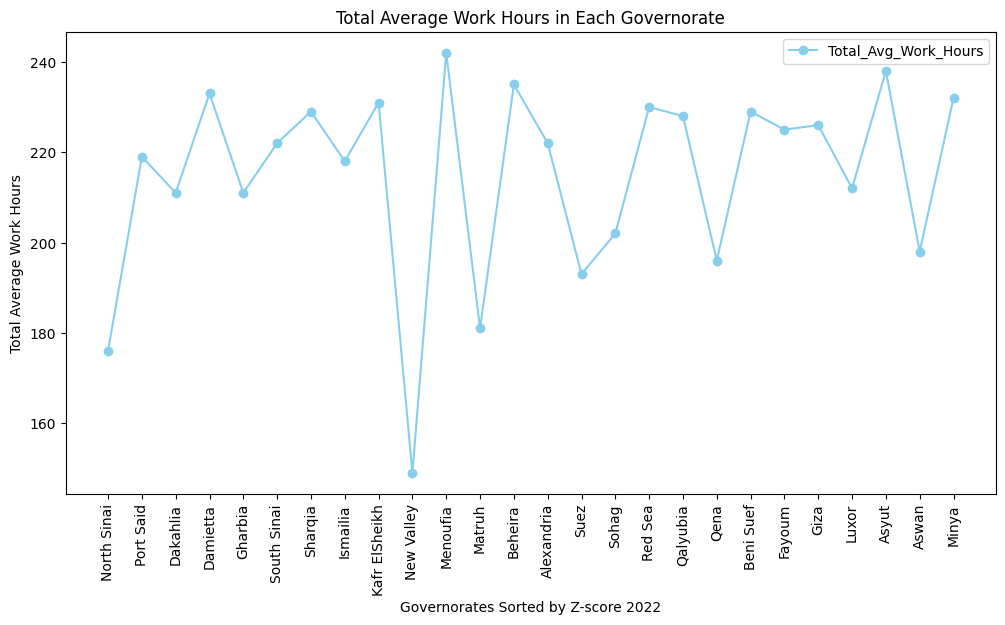

In [34]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Total_Avg_Work_Hours'], marker='o', color='skyblue', label='Total_Avg_Work_Hours')


plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Total Average Work Hours')
plt.title('Total Average Work Hours in Each Governorate')
plt.legend()


plt.show()

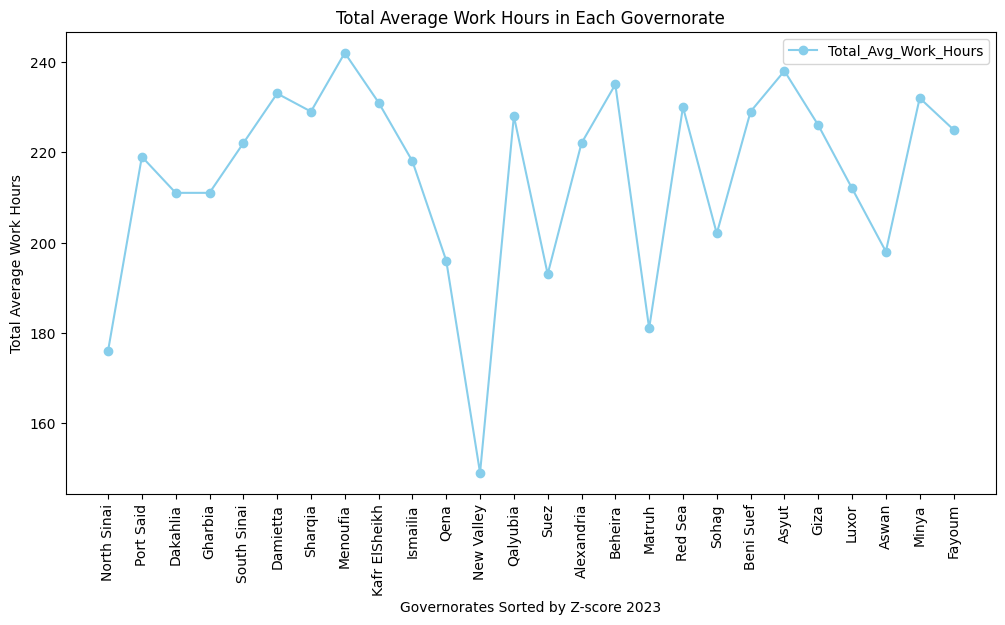

In [35]:
merged_df = merged_df.sort_values(by="zscore_2023",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Total_Avg_Work_Hours'], marker='o', color='skyblue', label='Total_Avg_Work_Hours')



plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2023')
plt.ylabel('Total Average Work Hours')
plt.title('Total Average Work Hours in Each Governorate')
plt.legend()


plt.show()

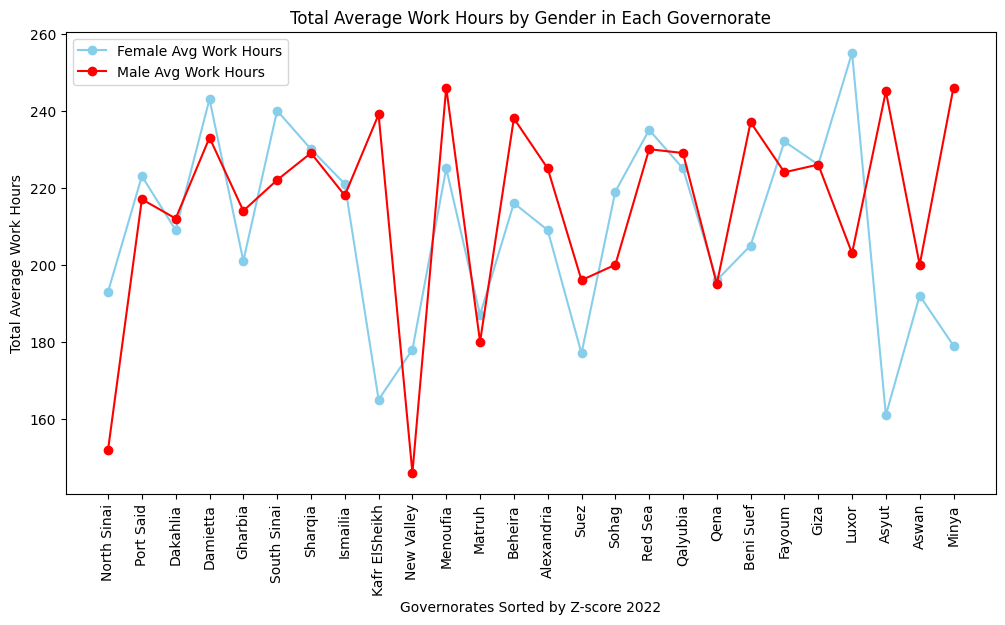

In [36]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Female_Avg_Work_Hours'], marker='o', color='skyblue', label='Female Avg Work Hours')
plt.plot(merged_df['Governorate'], merged_df['Male_Avg_Work_Hours'], marker='o', color='red', label='Male Avg Work Hours')

plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Total Average Work Hours')
plt.title('Total Average Work Hours by Gender in Each Governorate')
plt.legend()


plt.show()

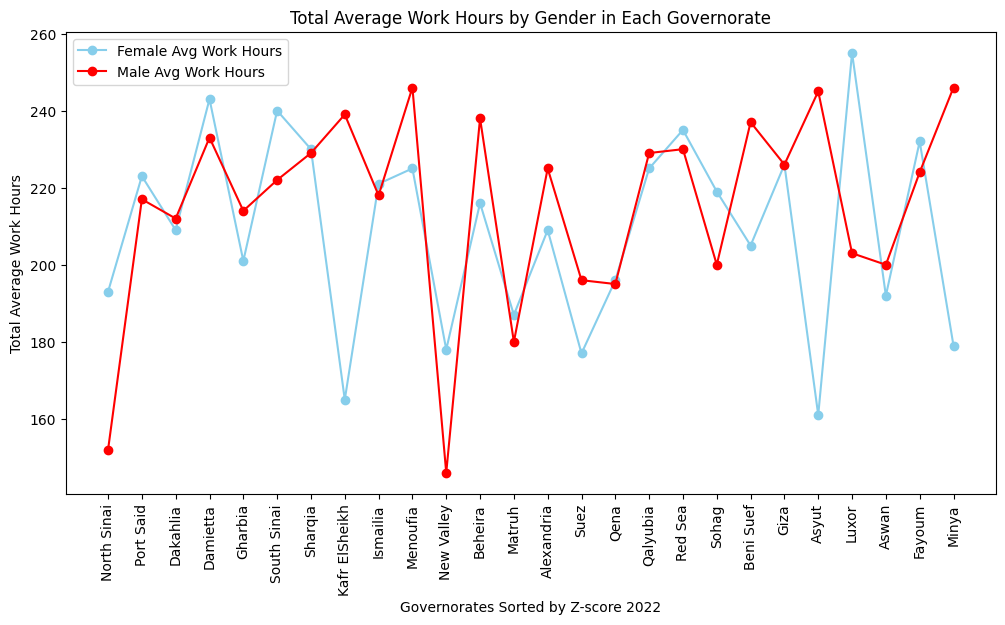

In [37]:
merged_df = merged_df.sort_values(by="total_mean_avg",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Female_Avg_Work_Hours'], marker='o', color='skyblue', label='Female Avg Work Hours')
plt.plot(merged_df['Governorate'], merged_df['Male_Avg_Work_Hours'], marker='o', color='red', label='Male Avg Work Hours')

plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Total Average Work Hours')
plt.title('Total Average Work Hours by Gender in Each Governorate')
plt.legend()


plt.show()

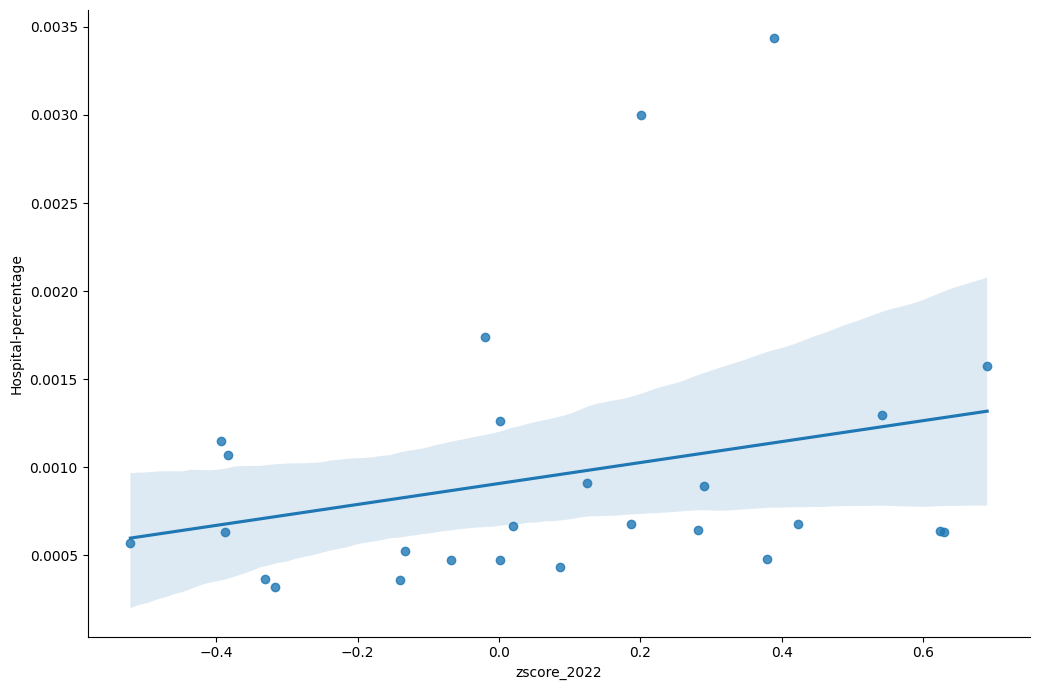

In [38]:
sns.lmplot(x="zscore_2022", y="Hospital-percentage", data=merged_df, height = 7 , aspect = 1.5)
plt.show()

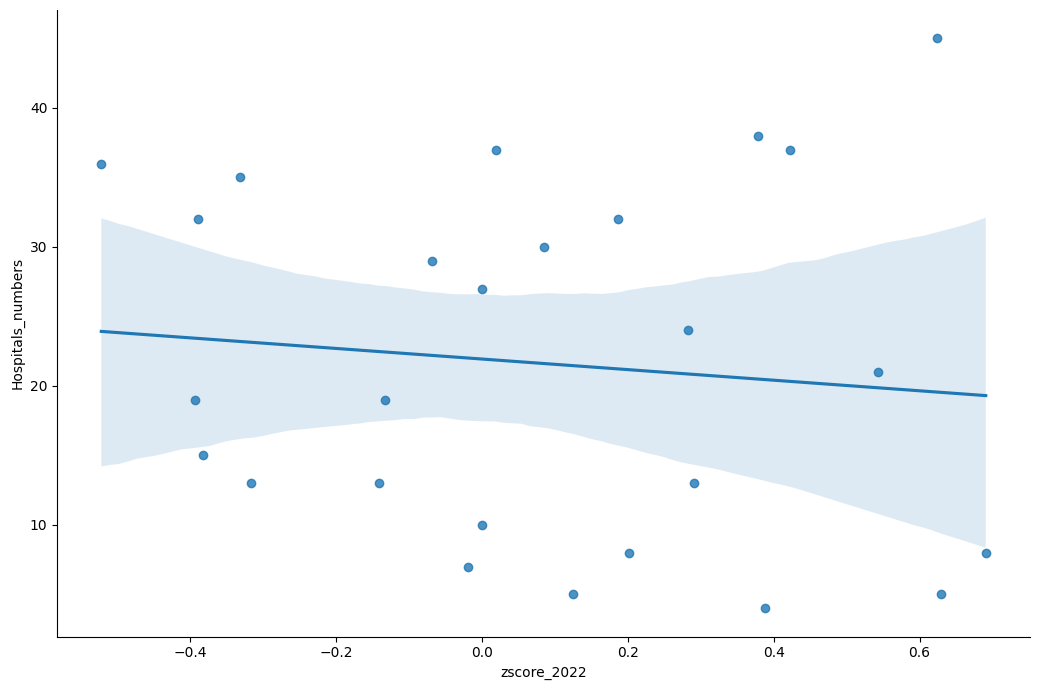

In [39]:
sns.lmplot(x="zscore_2022", y="Hospitals_numbers", data=merged_df, height = 7 , aspect = 1.5)
plt.show()

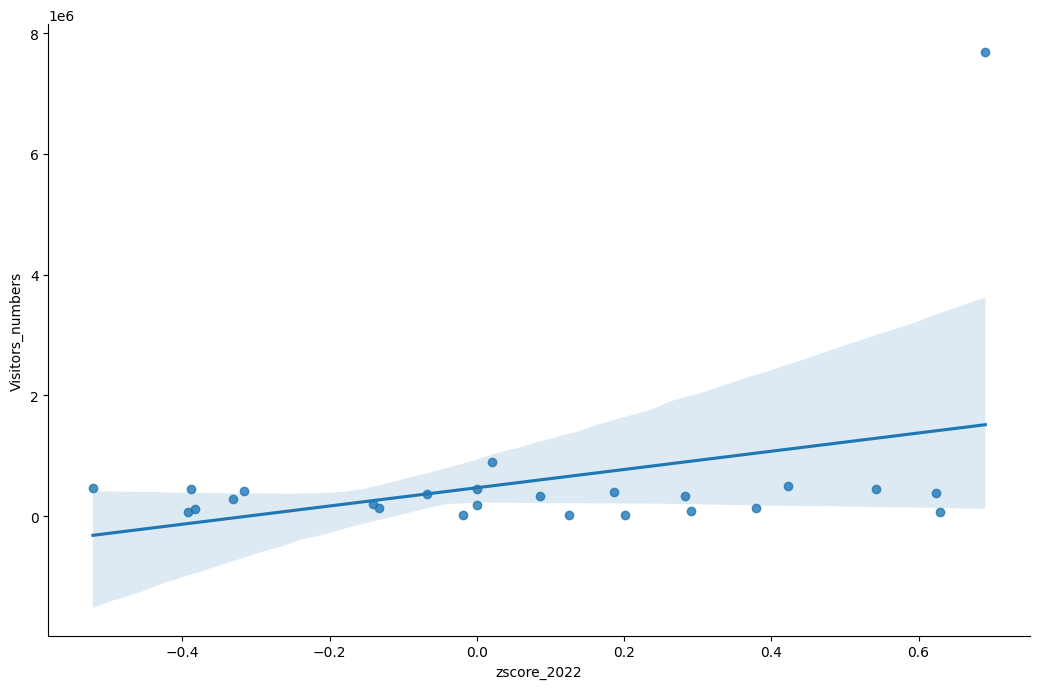

In [40]:
sns.lmplot(x="zscore_2022", y="Visitors_numbers", data=merged_df, height = 7 , aspect = 1.5)
plt.show()

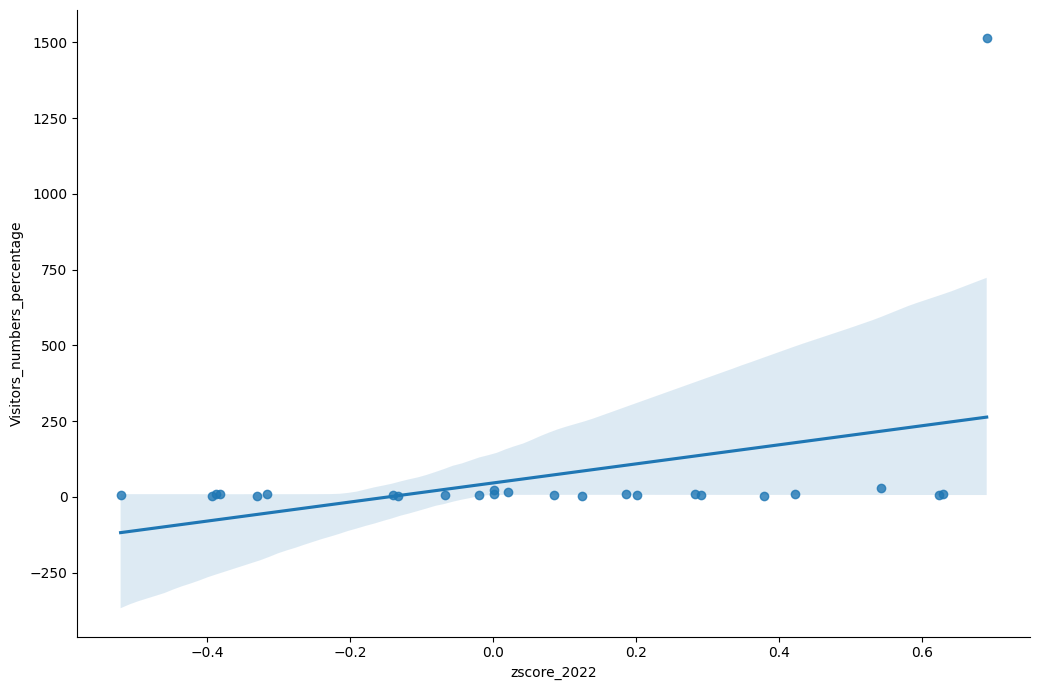

In [41]:
sns.lmplot(x="zscore_2022", y="Visitors_numbers_percentage", data=merged_df, height = 7 , aspect = 1.5)
plt.show()

 36  Hospitals_numbers                                  26 non-null     int64  
 37  Beds_numbers                                       26 non-null     int64  
 38  Intensive_Care_Beds_numbers                        26 non-null     int64  
 39  Incubators_numbers                                 26 non-null     int64  
 40  Dialysis_Devices_numbers                           26 non-null     int64  
 41  Respirators_numbers                                26 non-null     int64  
 42  Visitors_numbers                                   25 non-null     float64
 43  Hospital-percentage                                26 non-null     float64
 44  Beds_percentage                                    26 non-null     float64
 45  Intensive_care_beds_percentage                     26 non-null     float64
 46  Incubators_percentage                              26 non-null     float64
 47  Dialysis_devices_percentage                        26 non-null     float64
 48  Respirators_percentage                             26 non-null     float64
 49  Visitors_numbers_percentage

# JUST A EXPERIMENT


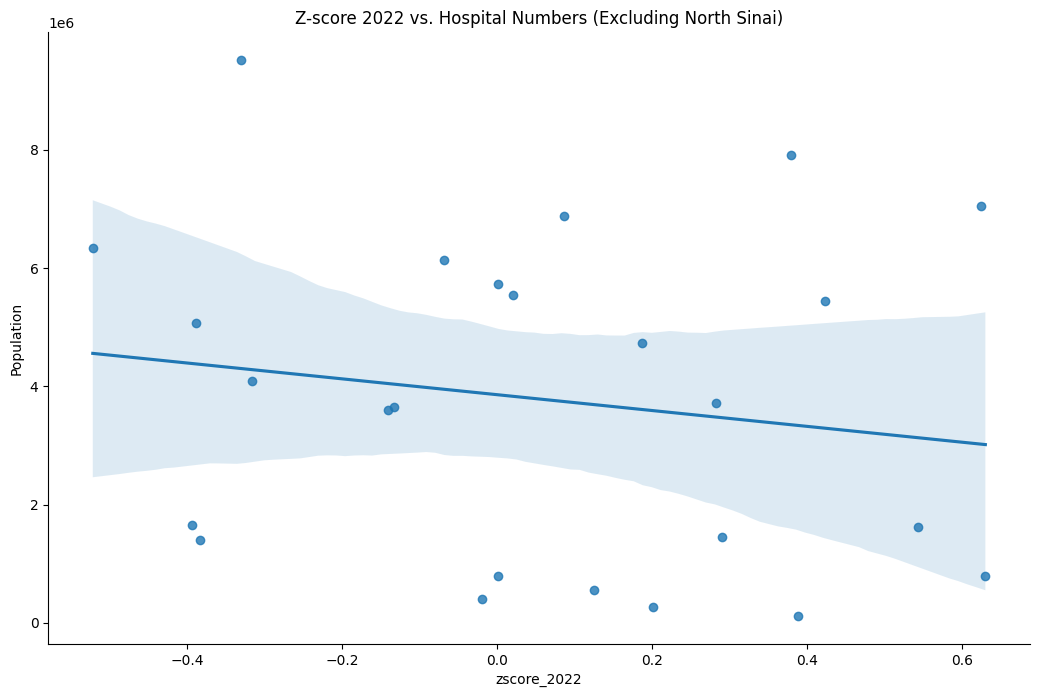

In [43]:
filtered_df = merged_df[merged_df['Governorate'] != 'North Sinai']

# Create the plot
sns.lmplot(x="zscore_2022", y="Population", data=filtered_df, height=7, aspect=1.5)
plt.title('Z-score 2022 vs. Hospital Numbers (Excluding North Sinai)')
plt.show()

# Work Force


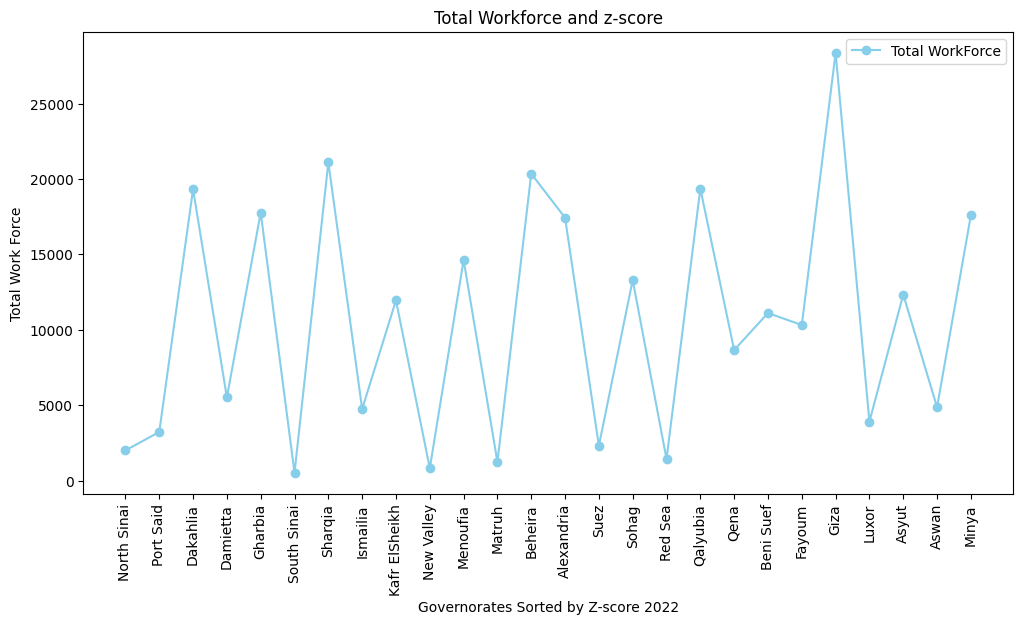

In [46]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Total'], marker='o', color='skyblue', label='Total WorkForce')


plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Total Work Force')
plt.title('Total Workforce and z-score')
plt.legend()


plt.show()

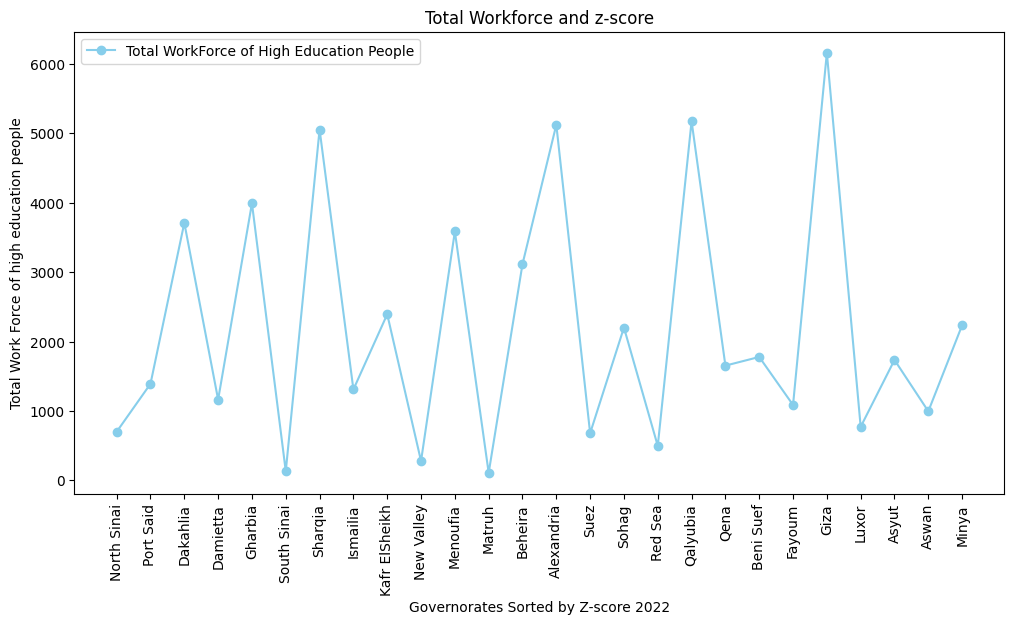

In [47]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['High_Education'], marker='o', color='skyblue', label='Total WorkForce of High Education People')


plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Total Work Force of high education people')
plt.title('Total Workforce and z-score')
plt.legend()


plt.show()

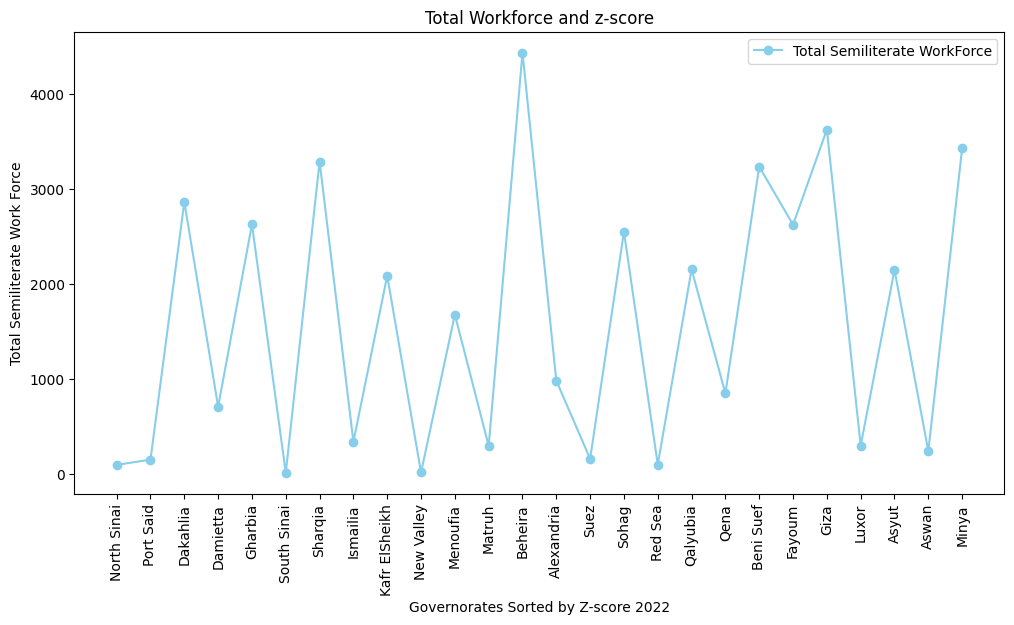

In [48]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Semiliterate'], marker='o', color='skyblue', label='Total Semiliterate WorkForce')


plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Total Semiliterate Work Force')
plt.title('Total Workforce and z-score')
plt.legend()


plt.show()

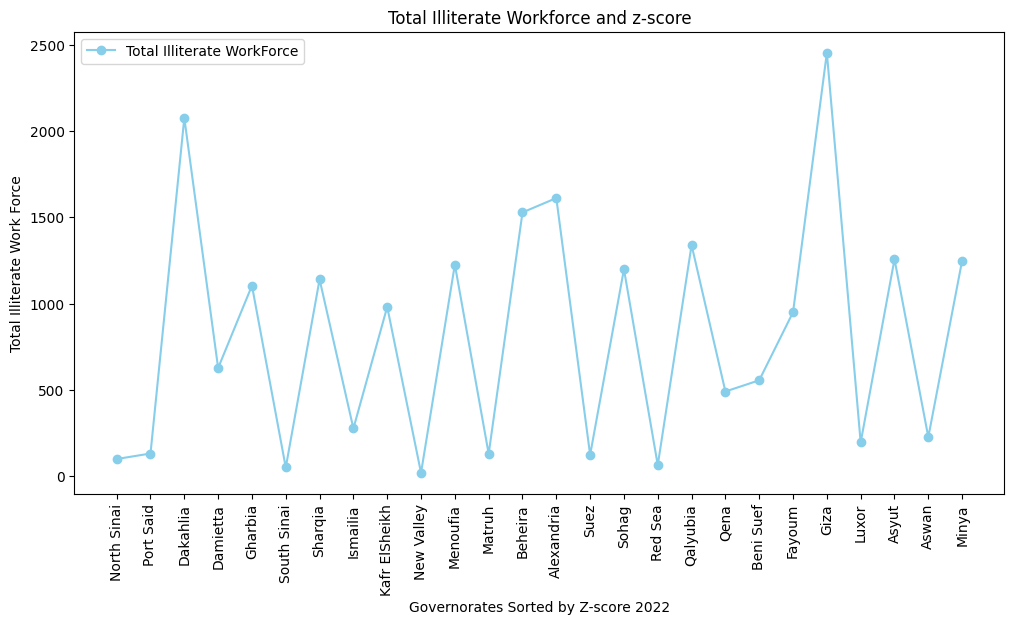

In [49]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Illiterate'], marker='o', color='skyblue', label='Total Illiterate WorkForce')


plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Total Illiterate Work Force')
plt.title('Total Illiterate Workforce and z-score')
plt.legend()


plt.show()

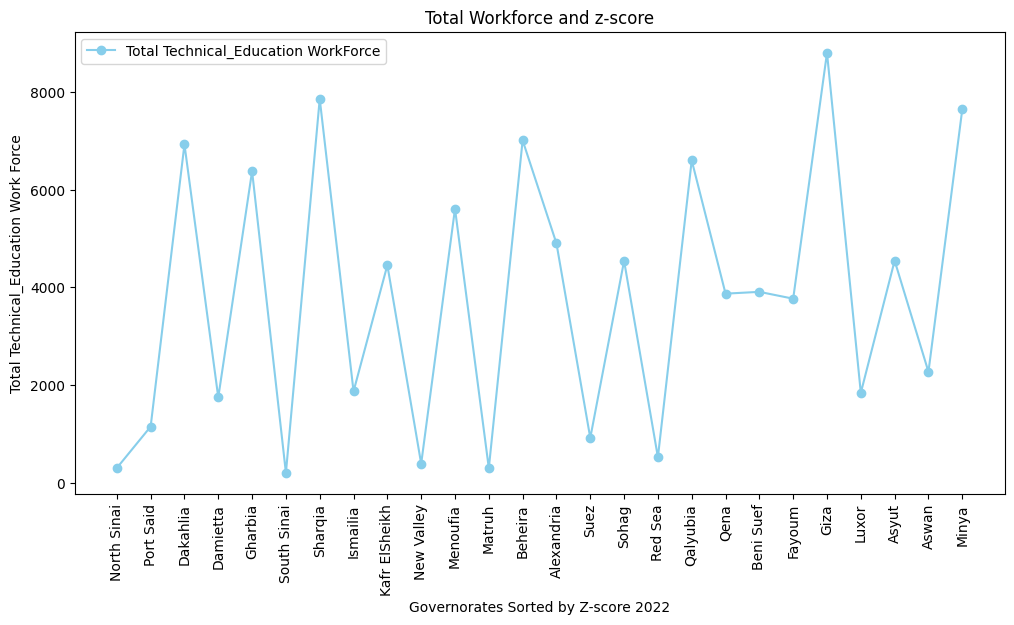

In [50]:
merged_df = merged_df.sort_values(by="zscore_2022",ascending = False)

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Governorate'], merged_df['Technical_Education'], marker='o', color='skyblue', label='Total Technical_Education WorkForce')


plt.xticks(rotation=90)
plt.xlabel('Governorates Sorted by Z-score 2022')
plt.ylabel('Total Technical_Education Work Force')
plt.title('Total Workforce and z-score')
plt.legend()


plt.show()